## Segment Visualisations

Creating more detailed visualisations for a report.

In [1]:
## Initalising libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

## Current market visualisations

In [2]:
## Loading the dataset
train_df = pd.read_csv('Train.csv')
new_clusters = pd.read_csv('new_clusters.csv')

## Clean underscores from dataframe
train_df = train_df.replace('_', ' ', regex=True)
train_df = train_df.rename(columns=lambda name: name.replace('_', ' '))
new_clusters = new_clusters.replace('_', ' ', regex=True)
new_clusters = new_clusters.rename(columns=lambda name: name.replace('_', ' '))

In [3]:
## Finding the counts of customers in each segment
segment_counts = pd.DataFrame(train_df['Segmentation'].value_counts()).reset_index()
segment_counts

,Segmentation,count
0,D,2268
1,A,1972
2,C,1970
3,B,1858


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Segment')]

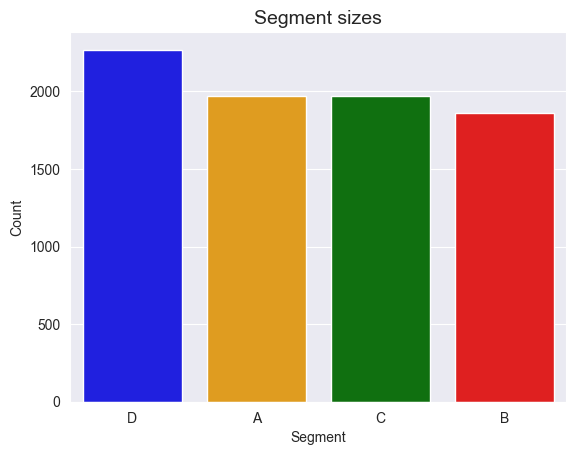

In [4]:
## Plotting the segments
sns.set_style('darkgrid')
palette = {'D': 'blue', 'A': 'orange','C': 'green','B': 'red',}

ax = sns.barplot(data=segment_counts, x='Segmentation', y='count', palette=palette, hue='Segmentation')
ax.set_title('Segment sizes', fontdict={'size': 14})
ax.set(ylabel='Count', xlabel='Segment')

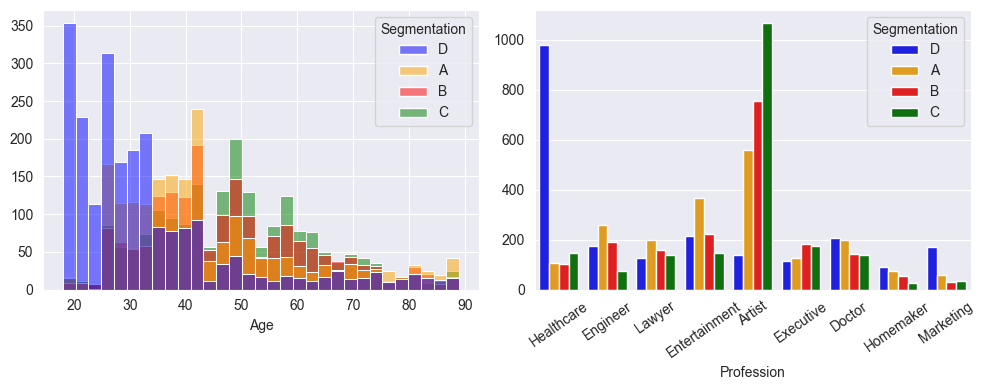

In [5]:
## Plotting segment details
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=train_df, x='Age', hue='Segmentation', palette=palette, ax=axs[0]).set(ylabel=None)
ax3 = sns.countplot(data=train_df, x='Profession', hue='Segmentation', palette=palette, ax=axs[1])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=35)
ax3.set_ylabel(None)

fig.tight_layout()

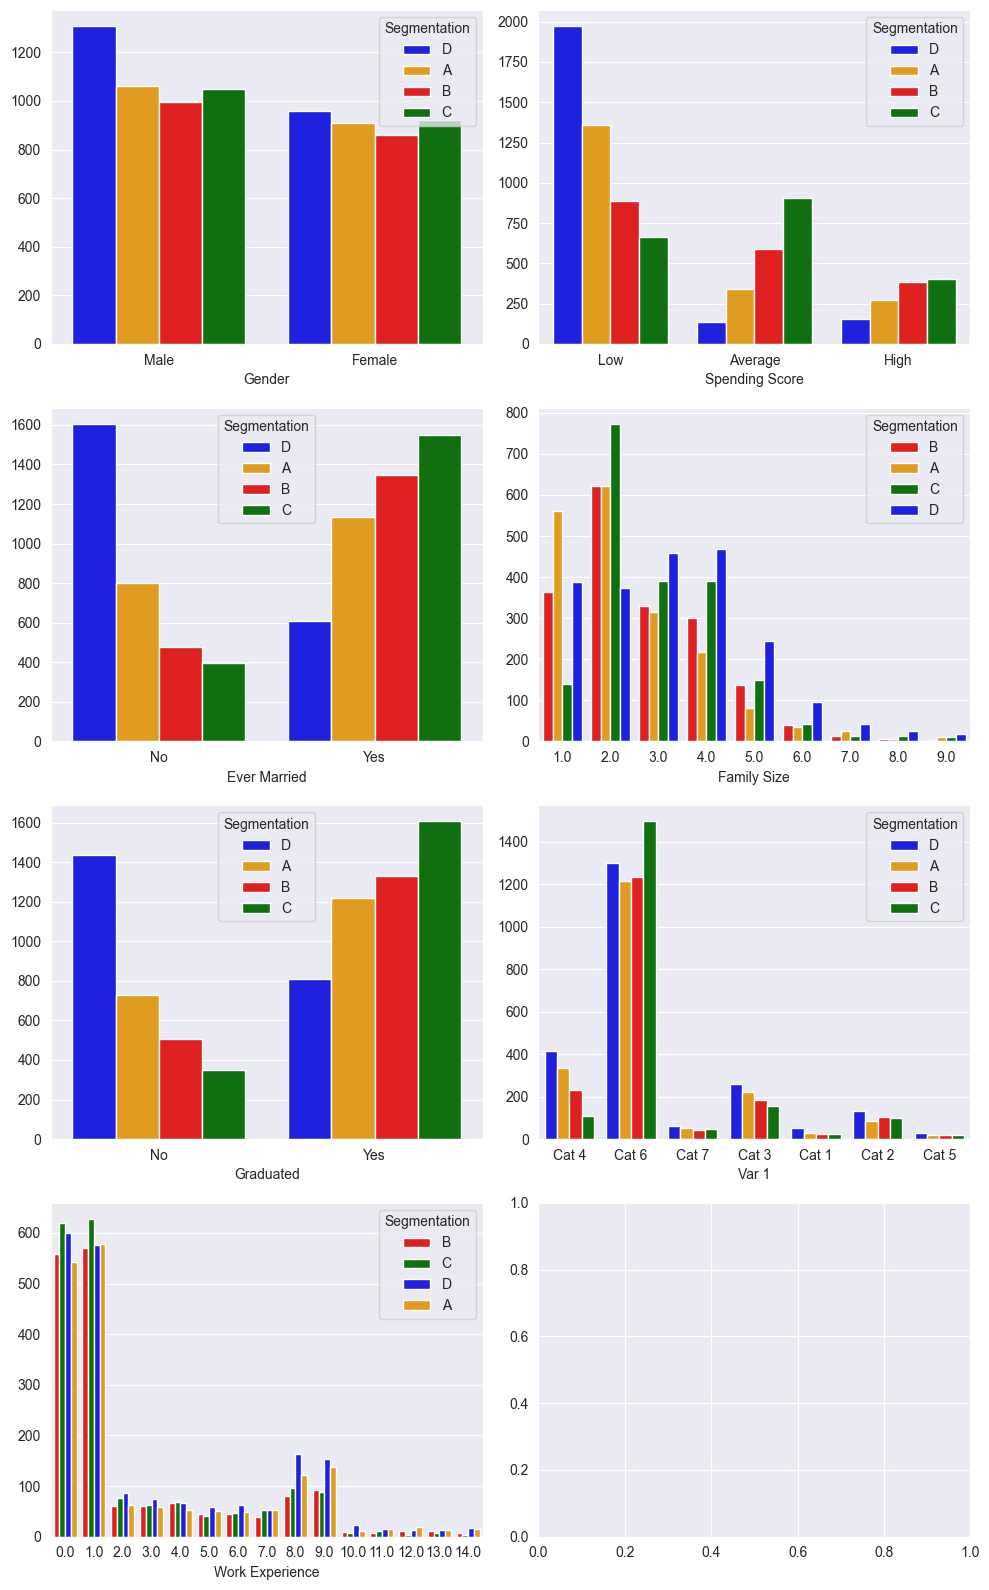

In [6]:
col_list = ['Gender', 'Ever Married', 'Graduated', 'Work Experience', 'Spending Score', 'Family Size', 'Var 1']
fig, axes = plt.subplots(4, 2, figsize=(10,16))
for i, feature in enumerate(col_list):
    sns.countplot(data=train_df, x=feature, hue='Segmentation', palette=palette, ax=axes[i%4, i//4]).set(ylabel=None)

fig.tight_layout()

## New Segments

In [7]:
## Mapping HCCluster to new segment categories
new_clusters['HCCluster'] = new_clusters['HCCluster'].map({1:'A', 2:'C', 3:'B', 4:'H', 5:'G', 6:'D', 7:'F', 8:'E'})
new_clusters.head()

,Segmentation,ID,Gender,Ever Married,Age,Graduated,Profession,Work Experience,Spending Score,Family Size,Var 1,KMCluster,HCCluster
0,D,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat 4,5,H
1,A,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat 4,3,B
2,B,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat 6,3,B
3,B,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat 6,4,A
4,A,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat 6,3,B


In [8]:
## Finding the counts of customers in the new segments
new_segment_counts = pd.DataFrame(new_clusters['HCCluster'].value_counts()).reset_index()
new_segment_counts

,HCCluster,count
0,A,1939
1,B,1394
2,F,945
3,D,894
4,H,843
5,G,789
6,E,741
7,C,523


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Segment')]

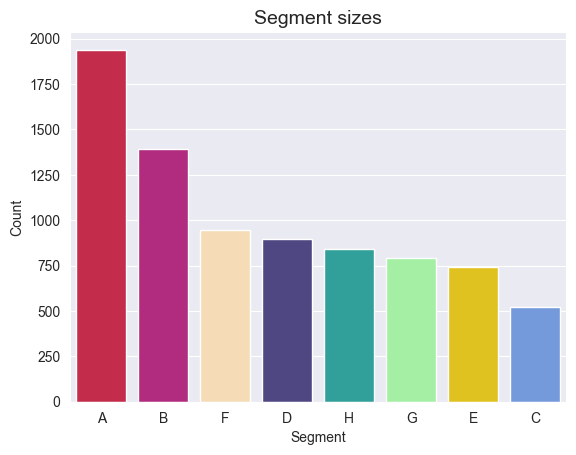

In [9]:
## Plotting the segments
sns.set_style('darkgrid')
new_palette = {'A': 'crimson', 'B': 'mediumvioletred', 'C': 'cornflowerblue', 'D': 'darkslateblue', 'E': 'gold', 'F': 'navajowhite', 'G': 'palegreen', 'H': 'lightseagreen'}

ax = sns.barplot(data=new_segment_counts, x='HCCluster', y='count', palette=new_palette, hue='HCCluster')
ax.set_title('Segment sizes', fontdict={'size': 14})
ax.set(ylabel='Count', xlabel='Segment')

### Segment A

In [10]:
## Creating a dataframe for Segment A
new_seg_a = new_clusters[new_clusters['HCCluster'] == 'A']
new_seg_a.head()

,Segmentation,ID,Gender,Ever Married,Age,Graduated,Profession,Work Experience,Spending Score,Family Size,Var 1,KMCluster,HCCluster
3,B,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat 6,4,A
18,B,466772,Male,Yes,58,Yes,Entertainment,1.0,Average,4.0,Cat 6,4,A
20,A,466084,Male,Yes,49,Yes,Homemaker,12.0,Low,1.0,Cat 3,4,A
22,A,465602,Male,Yes,33,Yes,Artist,13.0,Low,2.0,Cat 3,4,A
27,C,459717,Male,Yes,49,Yes,Artist,1.0,Average,3.0,Cat 6,4,A


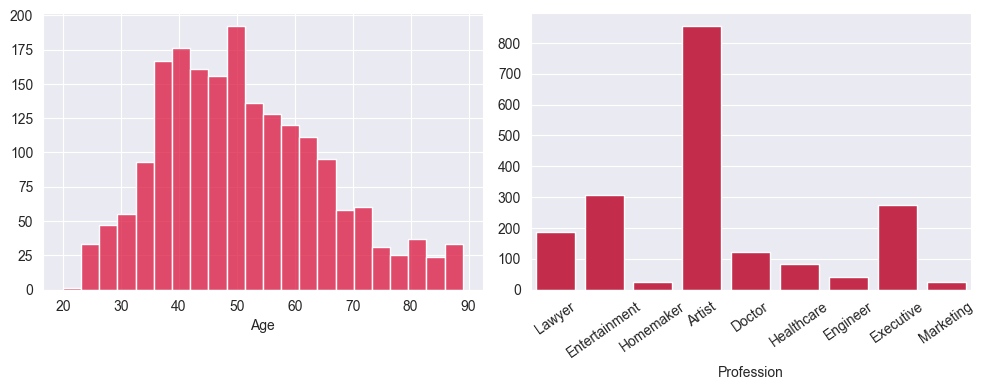

In [11]:
## Plotting segment details
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=new_seg_a, x='Age', color='crimson', ax=axs[0]).set(ylabel=None)
ax3 = sns.countplot(data=new_seg_a, x='Profession', color='crimson', ax=axs[1])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=35)
ax3.set_ylabel(None)

fig.tight_layout()

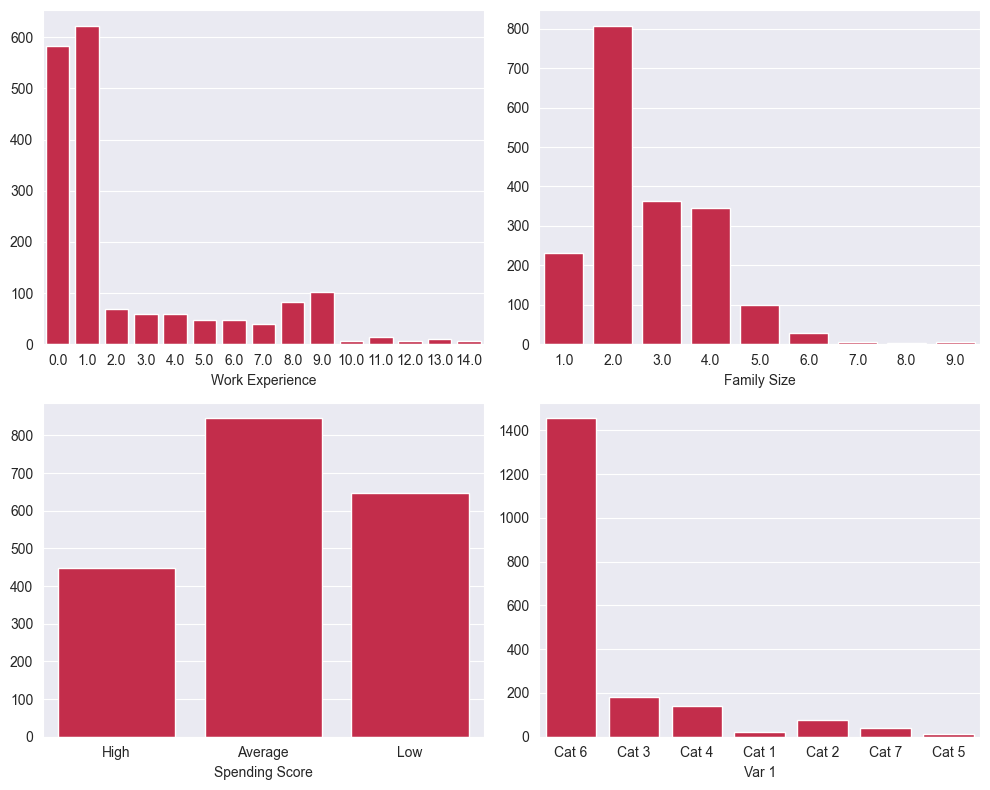

In [12]:
col_list = ['Work Experience', 'Spending Score', 'Family Size', 'Var 1']
fig, axes = plt.subplots(2, 2, figsize=(10,8))
for i, feature in enumerate(col_list):
    sns.countplot(data=new_seg_a, x=feature, color='crimson', ax=axes[i%2, i//2]).set(ylabel=None)

fig.tight_layout()

### Segment B

In [13]:
## Creating a dataframe for Segment B
new_seg_b = new_clusters[new_clusters['HCCluster'] == 'B']
new_seg_b.head()

,Segmentation,ID,Gender,Ever Married,Age,Graduated,Profession,Work Experience,Spending Score,Family Size,Var 1,KMCluster,HCCluster
1,A,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat 4,3,B
2,B,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat 6,3,B
4,A,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat 6,3,B
8,D,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat 7,3,B
9,C,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat 6,3,B


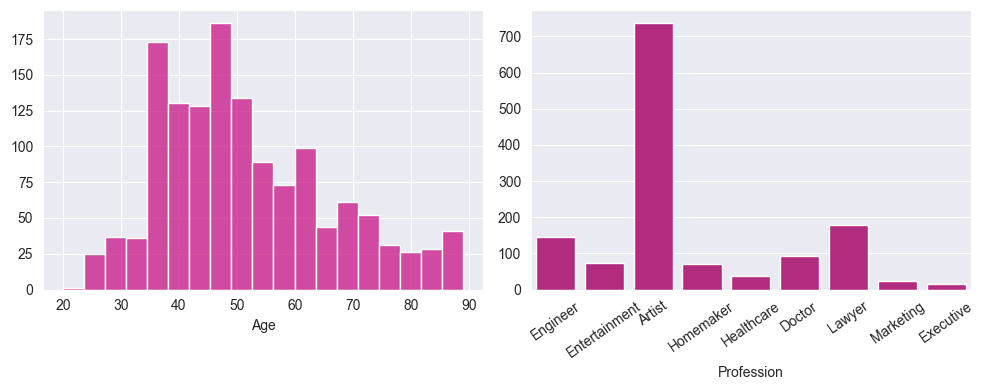

In [14]:
## Plotting segment details
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=new_seg_b, x='Age', color='mediumvioletred', ax=axs[0]).set(ylabel=None)
ax3 = sns.countplot(data=new_seg_b, x='Profession', color='mediumvioletred', ax=axs[1])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=35)
ax3.set_ylabel(None)

fig.tight_layout()

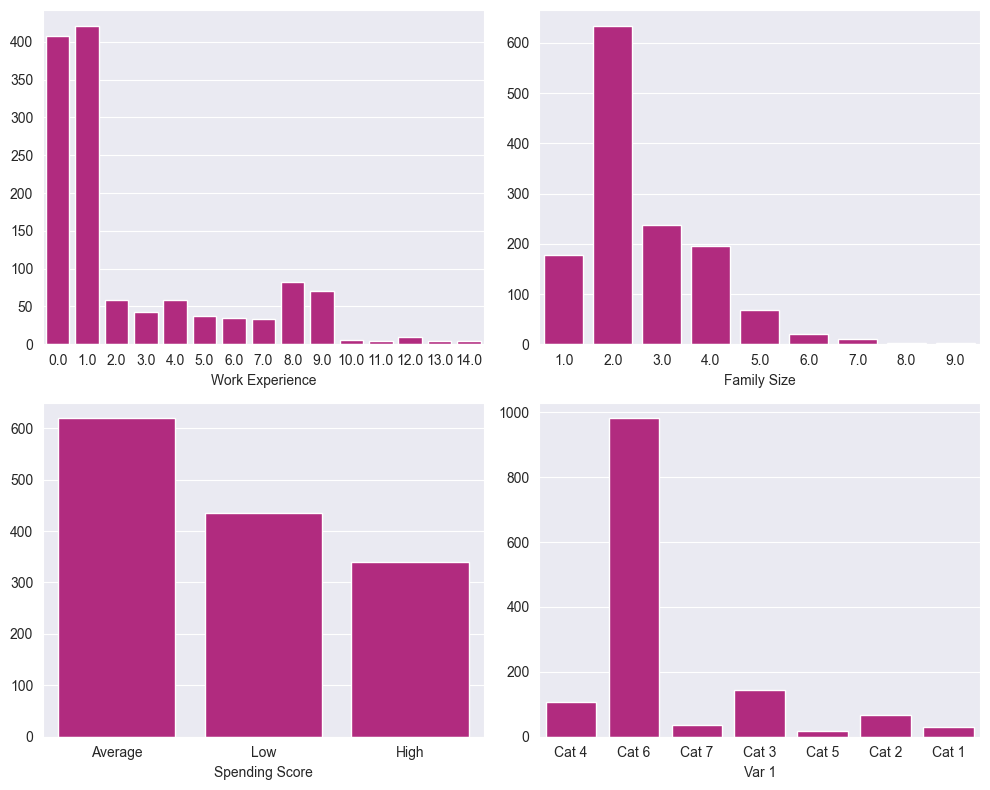

In [15]:
col_list = ['Work Experience', 'Spending Score', 'Family Size', 'Var 1']
fig, axes = plt.subplots(2, 2, figsize=(10,8))
for i, feature in enumerate(col_list):
    sns.countplot(data=new_seg_b, x=feature, color='mediumvioletred', ax=axes[i%2, i//2]).set(ylabel=None)

fig.tight_layout()

### Segment C

In [16]:
## Creating a dataframe for Segment C
new_seg_c = new_clusters[new_clusters['HCCluster'] == 'C']
new_seg_c.head()

,Segmentation,ID,Gender,Ever Married,Age,Graduated,Profession,Work Experience,Spending Score,Family Size,Var 1,KMCluster,HCCluster
14,B,460849,Female,Yes,58,No,Doctor,0.0,Low,1.0,Cat 3,8,C
24,B,461021,Female,NaN,58,No,Executive,1.0,Average,3.0,Cat 3,8,C
31,A,462216,Female,Yes,42,No,Doctor,1.0,Low,2.0,Cat 4,8,C
34,D,459861,Female,Yes,83,No,Lawyer,1.0,High,2.0,Cat 6,8,C
37,D,460593,Female,Yes,28,No,Healthcare,1.0,Average,5.0,Cat 3,8,C


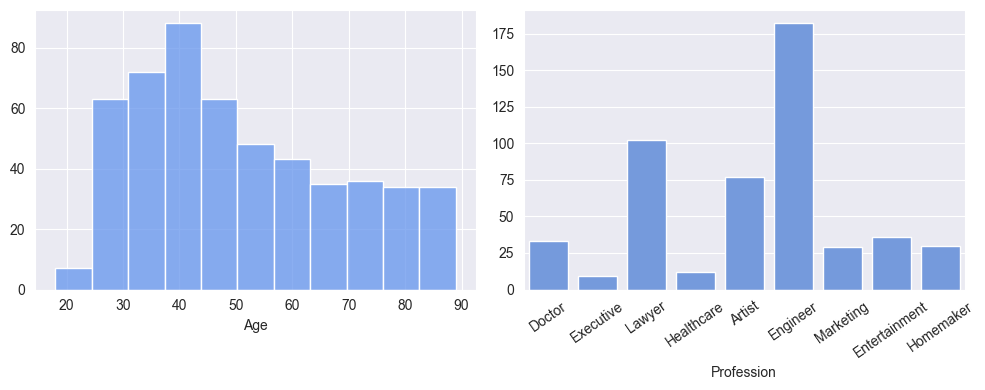

In [17]:
## Plotting segment details
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=new_seg_c, x='Age', color='cornflowerblue', ax=axs[0]).set(ylabel=None)
ax3 = sns.countplot(data=new_seg_c, x='Profession', color='cornflowerblue', ax=axs[1])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=35)
ax3.set_ylabel(None)

fig.tight_layout()

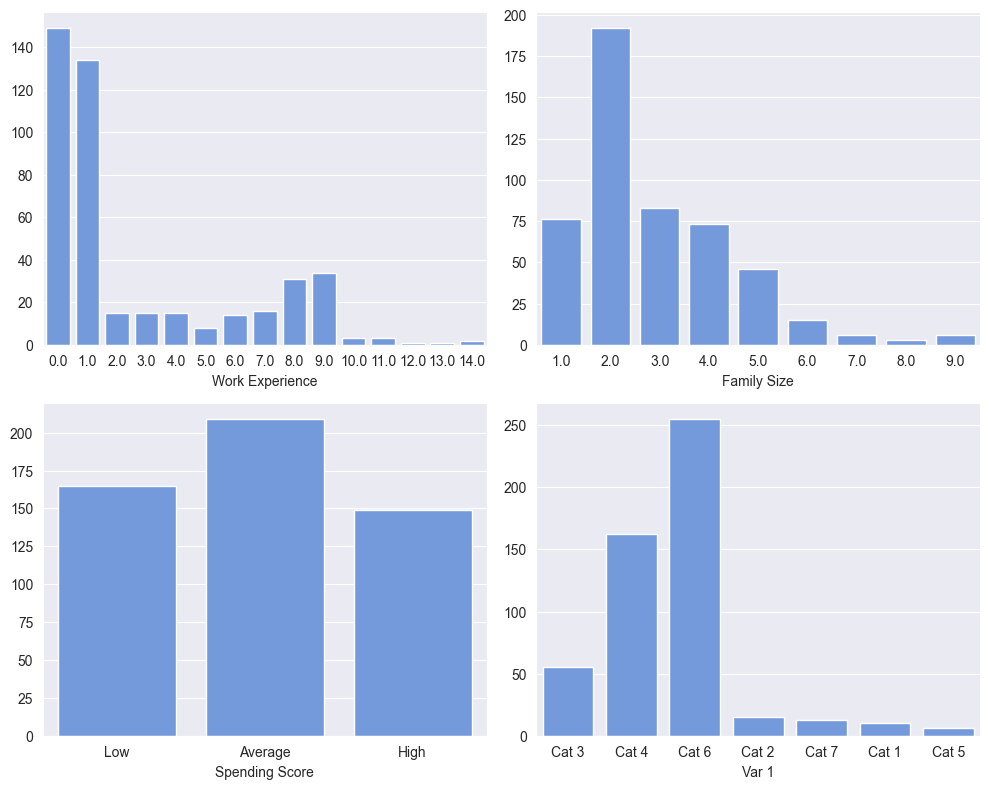

In [18]:
col_list = ['Work Experience', 'Spending Score', 'Family Size', 'Var 1']
fig, axes = plt.subplots(2, 2, figsize=(10,8))
for i, feature in enumerate(col_list):
    sns.countplot(data=new_seg_c, x=feature, color='cornflowerblue', ax=axes[i%2, i//2]).set(ylabel=None)

fig.tight_layout()

### Segment D

In [19]:
## Creating a dataframe for Segment D
new_seg_d = new_clusters[new_clusters['HCCluster'] == 'D']
new_seg_d.head()

,Segmentation,ID,Gender,Ever Married,Age,Graduated,Profession,Work Experience,Spending Score,Family Size,Var 1,KMCluster,HCCluster
5,C,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat 6,1,D
13,A,459573,Male,Yes,70,No,Lawyer,NaN,Low,1.0,Cat 6,1,D
25,C,465083,Male,Yes,56,No,Artist,1.0,Average,3.0,Cat 6,1,D
44,A,466152,Male,Yes,40,No,Engineer,8.0,Low,1.0,Cat 6,1,D
54,A,464961,Male,Yes,76,No,Marketing,1.0,Low,1.0,Cat 4,1,D


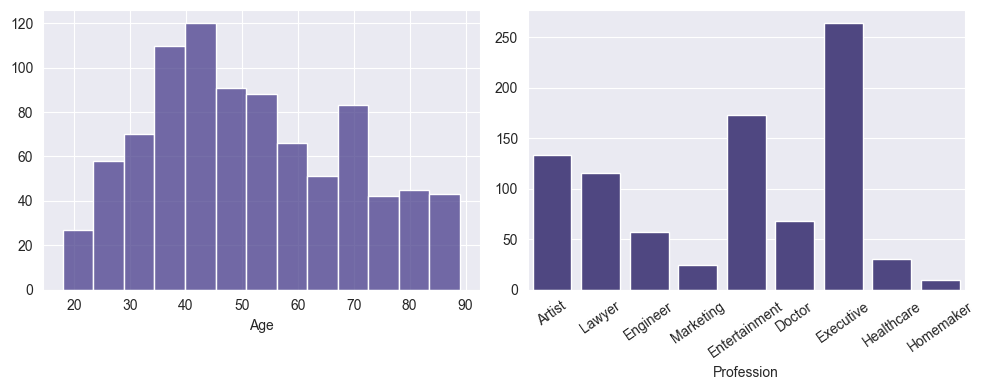

In [20]:
## Plotting segment details
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=new_seg_d, x='Age', color='darkslateblue', ax=axs[0]).set(ylabel=None)
ax3 = sns.countplot(data=new_seg_d, x='Profession', color='darkslateblue', ax=axs[1])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=35)
ax3.set_ylabel(None)

fig.tight_layout()

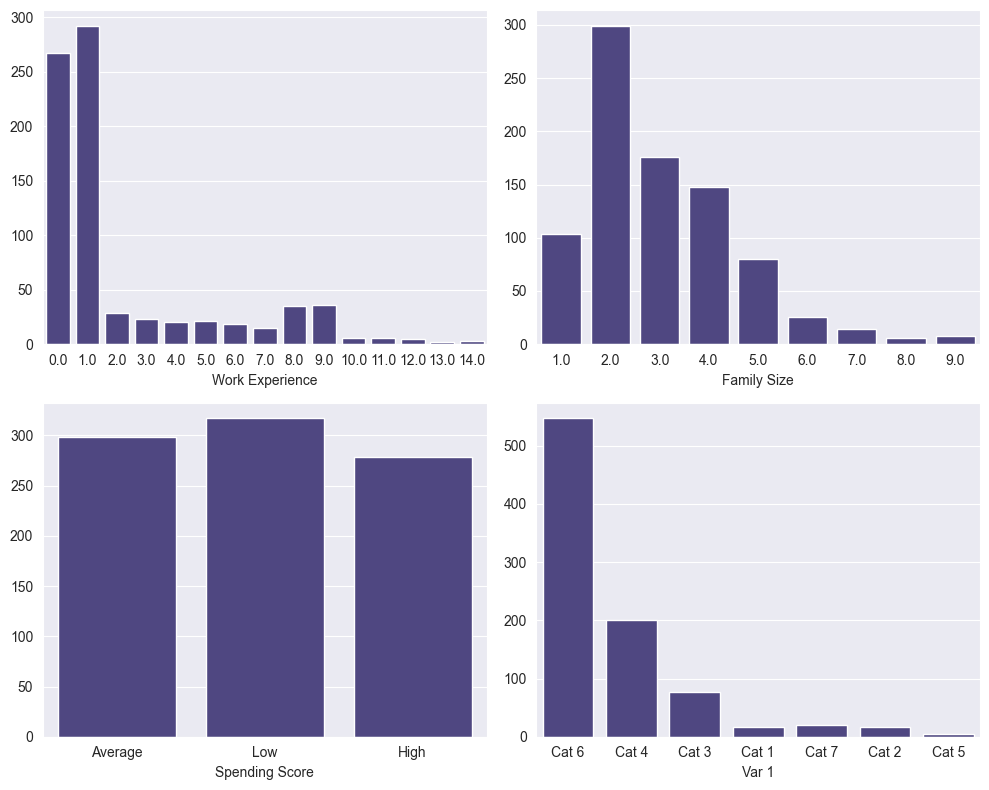

In [21]:
col_list = ['Work Experience', 'Spending Score', 'Family Size', 'Var 1']
fig, axes = plt.subplots(2, 2, figsize=(10,8))
for i, feature in enumerate(col_list):
    sns.countplot(data=new_seg_d, x=feature, color='darkslateblue', ax=axes[i%2, i//2]).set(ylabel=None)

fig.tight_layout()

### Segment E

In [22]:
## Creating a dataframe for Segment E
new_seg_e = new_clusters[new_clusters['HCCluster'] == 'E']
new_seg_e.head()

,Segmentation,ID,Gender,Ever Married,Age,Graduated,Profession,Work Experience,Spending Score,Family Size,Var 1,KMCluster,HCCluster
6,C,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat 6,7,E
28,B,465882,Male,No,35,Yes,Artist,0.0,Low,1.0,Cat 6,7,E
56,D,465769,Male,No,25,Yes,Healthcare,9.0,Low,4.0,Cat 6,7,E
57,D,462267,Male,No,32,NaN,Doctor,8.0,Low,2.0,Cat 6,7,E
65,A,461356,Male,No,25,Yes,Entertainment,0.0,Low,2.0,Cat 6,7,E


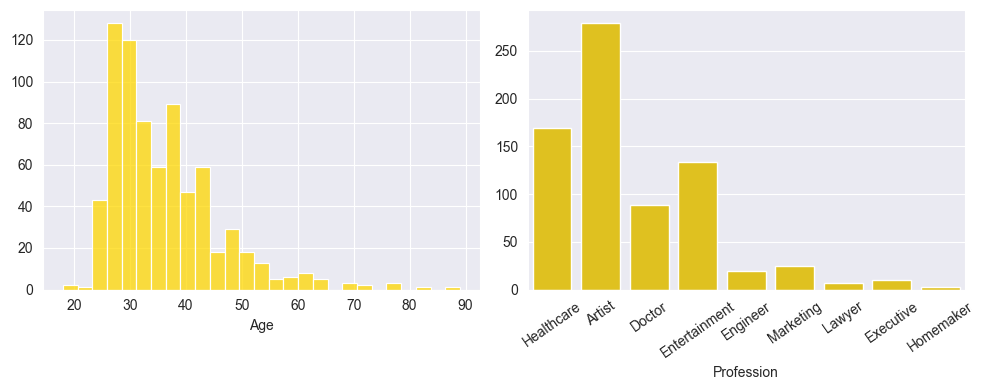

In [23]:
## Plotting segment details
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=new_seg_e, x='Age', color='gold', ax=axs[0]).set(ylabel=None)
ax3 = sns.countplot(data=new_seg_e, x='Profession', color='gold', ax=axs[1])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=35)
ax3.set_ylabel(None)

fig.tight_layout()

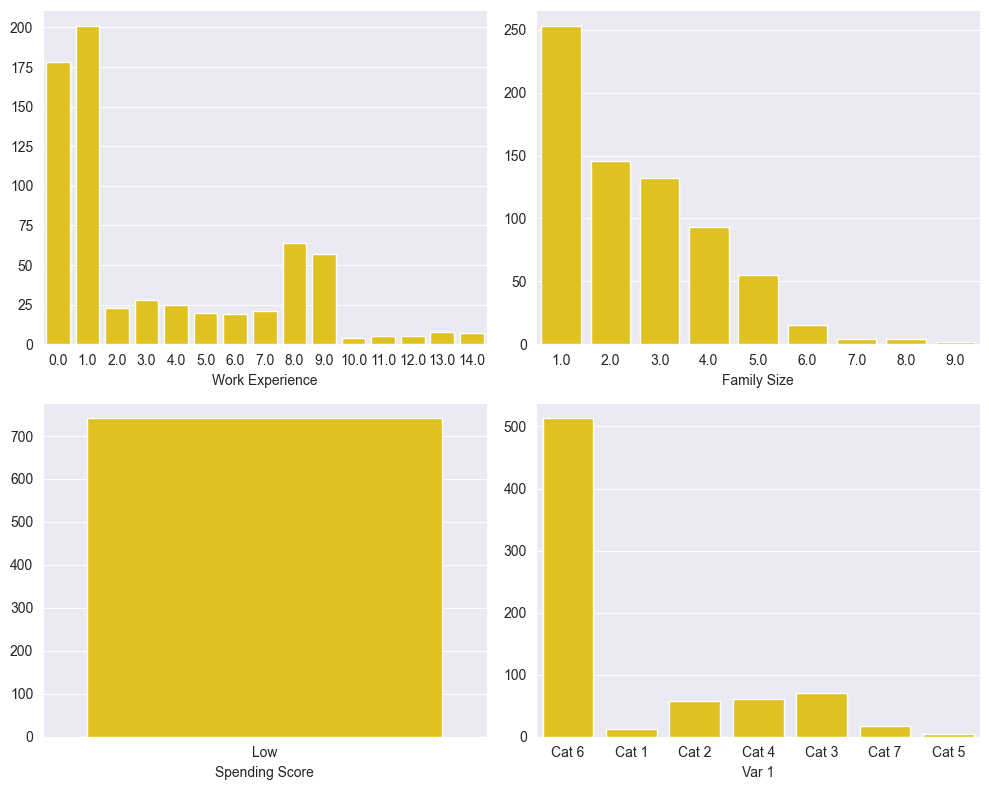

In [24]:
col_list = ['Work Experience', 'Spending Score', 'Family Size', 'Var 1']
fig, axes = plt.subplots(2, 2, figsize=(10,8))
for i, feature in enumerate(col_list):
    sns.countplot(data=new_seg_e, x=feature, color='gold', ax=axes[i%2, i//2]).set(ylabel=None)

fig.tight_layout()

### Segment F

In [25]:
## Creating a dataframe for Segment F
new_seg_f = new_clusters[new_clusters['HCCluster'] == 'F']
new_seg_f.head()

,Segmentation,ID,Gender,Ever Married,Age,Graduated,Profession,Work Experience,Spending Score,Family Size,Var 1,KMCluster,HCCluster
7,D,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat 6,2,F
10,A,464041,Female,No,26,Yes,Engineer,1.0,Low,3.0,Cat 6,2,F
23,B,459168,Female,No,36,Yes,Artist,5.0,Low,2.0,Cat 6,2,F
35,D,467917,Female,No,27,Yes,Healthcare,3.0,Low,4.0,Cat 1,2,F
40,B,462044,Female,No,47,Yes,Artist,4.0,Low,1.0,Cat 6,2,F


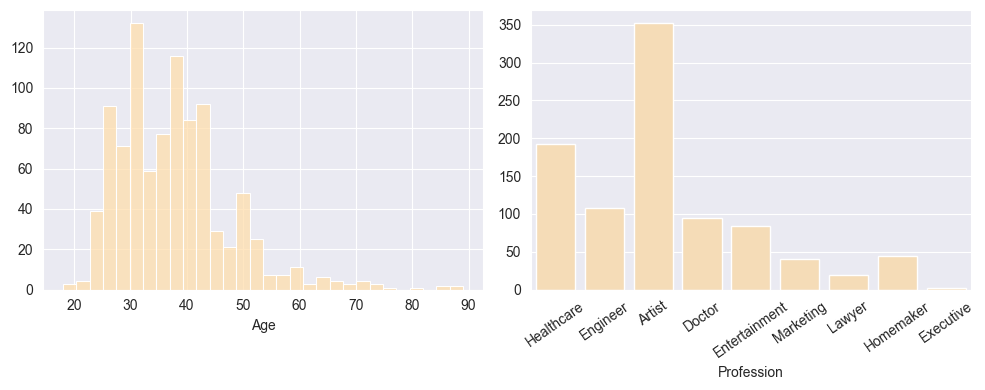

In [26]:
## Plotting segment details
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=new_seg_f, x='Age', color='navajowhite', ax=axs[0]).set(ylabel=None)
ax3 = sns.countplot(data=new_seg_f, x='Profession', color='navajowhite', ax=axs[1])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=35)
ax3.set_ylabel(None)

fig.tight_layout()

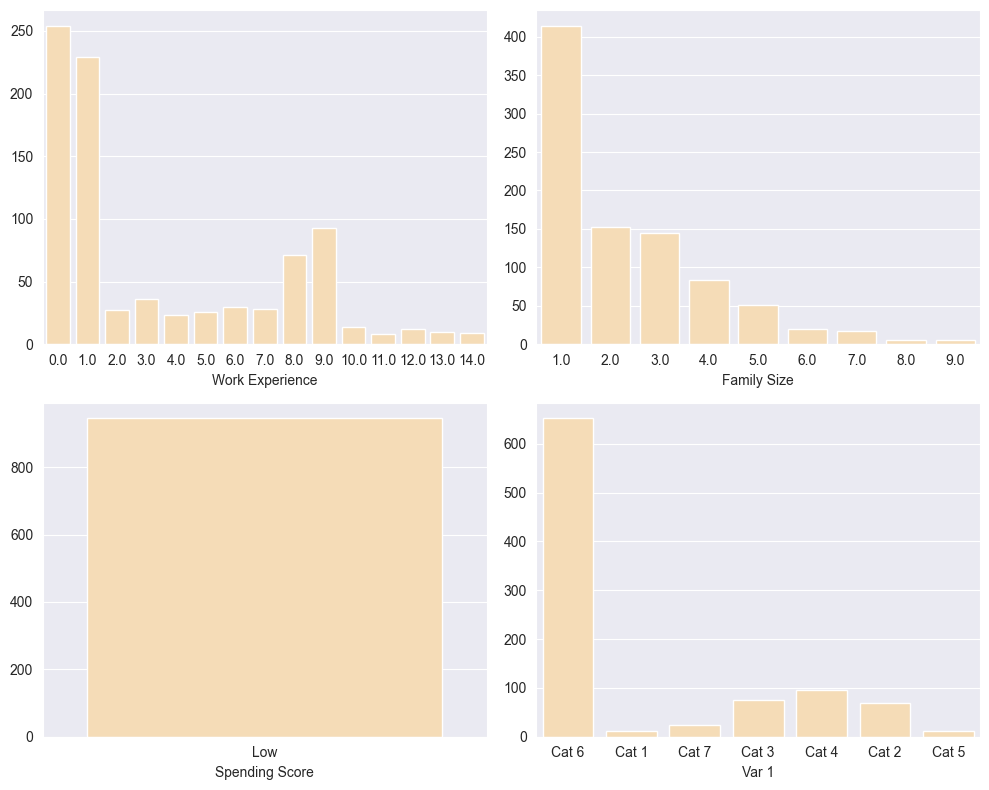

In [27]:
col_list = ['Work Experience', 'Spending Score', 'Family Size', 'Var 1']
fig, axes = plt.subplots(2, 2, figsize=(10,8))
for i, feature in enumerate(col_list):
    sns.countplot(data=new_seg_f, x=feature, color='navajowhite', ax=axes[i%2, i//2]).set(ylabel=None)

fig.tight_layout()

### Segment G

In [28]:
## Creating a dataframe for Segment G
new_seg_g = new_clusters[new_clusters['HCCluster'] == 'G']
new_seg_g.head()

,Segmentation,ID,Gender,Ever Married,Age,Graduated,Profession,Work Experience,Spending Score,Family Size,Var 1,KMCluster,HCCluster
12,D,461230,Female,No,19,No,Executive,0.0,Low,NaN,Cat 3,6,G
15,C,460563,Female,No,41,No,Healthcare,1.0,Low,2.0,Cat 1,6,G
16,D,466865,Female,No,32,No,Homemaker,9.0,Low,5.0,Cat 3,6,G
21,D,459675,Female,No,18,No,Healthcare,3.0,Low,4.0,Cat 6,6,G
29,C,461996,Female,No,35,No,Artist,5.0,Low,4.0,Cat 6,6,G


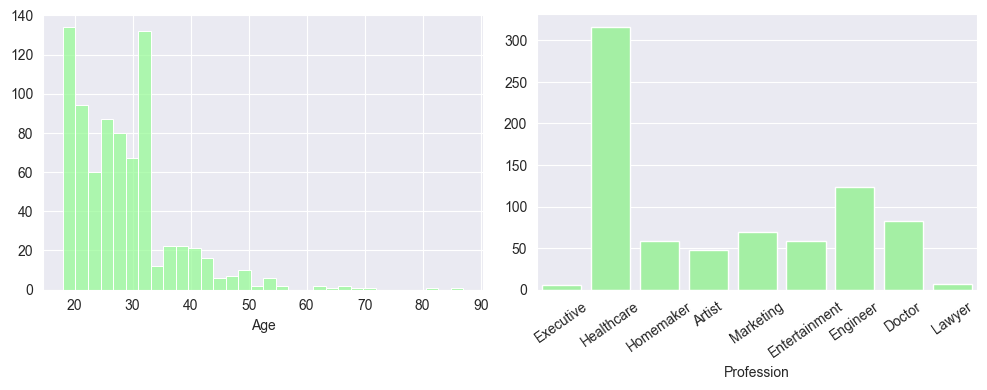

In [29]:
## Plotting segment details
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=new_seg_g, x='Age', color='palegreen', ax=axs[0]).set(ylabel=None)
ax3 = sns.countplot(data=new_seg_g, x='Profession', color='palegreen', ax=axs[1])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=35)
ax3.set_ylabel(None)

fig.tight_layout()

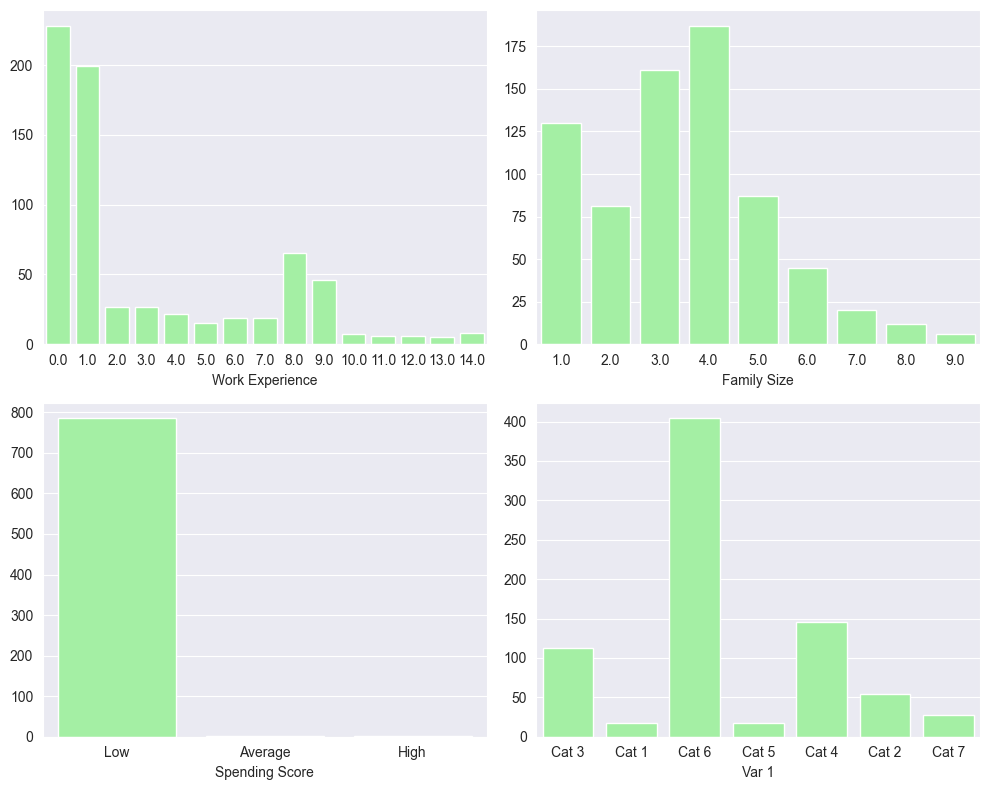

In [30]:
col_list = ['Work Experience', 'Spending Score', 'Family Size', 'Var 1']
fig, axes = plt.subplots(2, 2, figsize=(10,8))
for i, feature in enumerate(col_list):
    sns.countplot(data=new_seg_g, x=feature, color='palegreen', ax=axes[i%2, i//2]).set(ylabel=None)

fig.tight_layout()

### Segment H

In [31]:
## Creating a dataframe for Segment H
new_seg_h = new_clusters[new_clusters['HCCluster'] == 'H']
new_seg_h.head()

,Segmentation,ID,Gender,Ever Married,Age,Graduated,Profession,Work Experience,Spending Score,Family Size,Var 1,KMCluster,HCCluster
0,D,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat 4,5,H
11,D,464942,Male,No,19,No,Healthcare,4.0,Low,4.0,Cat 4,5,H
17,B,461644,Male,No,31,No,Healthcare,1.0,Low,6.0,Cat 6,5,H
26,A,467604,Male,No,31,No,Healthcare,9.0,Low,8.0,Cat 4,5,H
32,D,462454,Male,No,19,No,Healthcare,1.0,Low,3.0,Cat 2,5,H


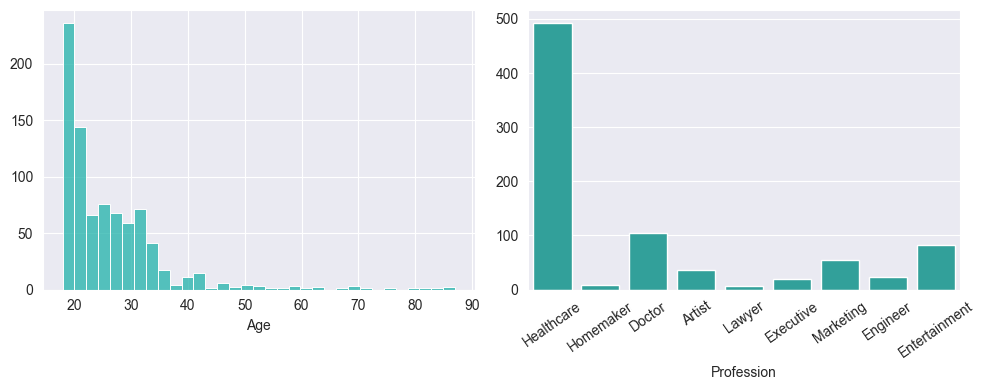

In [32]:
## Plotting segment details
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=new_seg_h, x='Age', color='lightseagreen', ax=axs[0]).set(ylabel=None)
ax3 = sns.countplot(data=new_seg_h, x='Profession', color='lightseagreen', ax=axs[1])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=35)
ax3.set_ylabel(None)

fig.tight_layout()

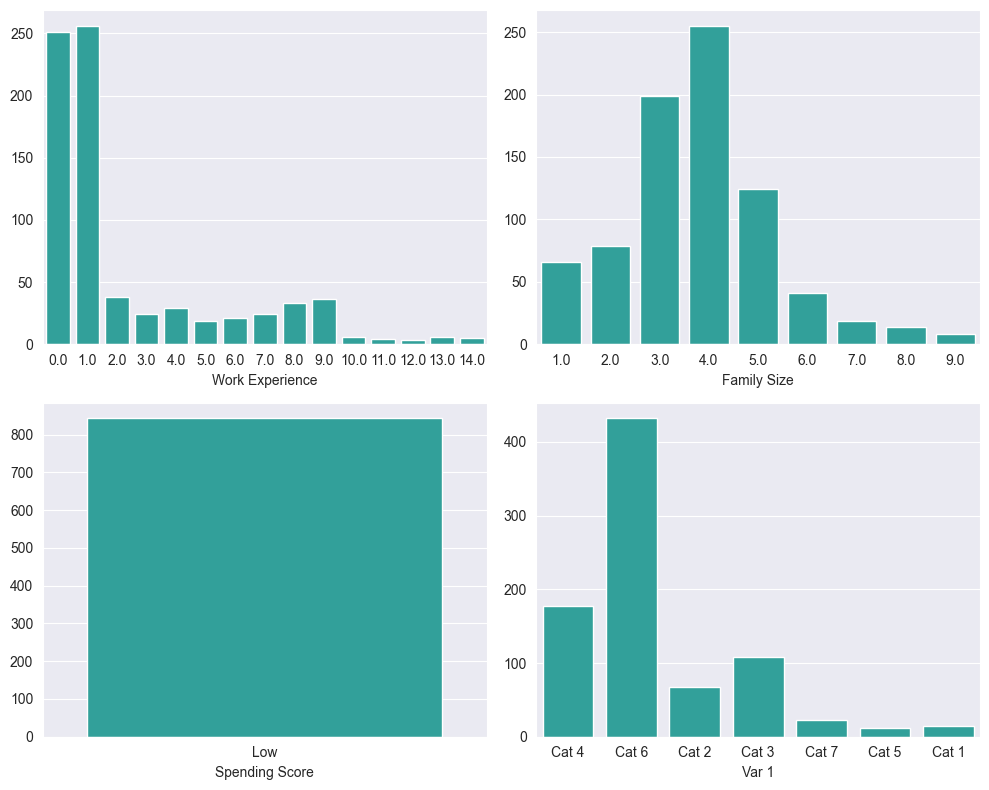

In [33]:
col_list = ['Work Experience', 'Spending Score', 'Family Size', 'Var 1']
fig, axes = plt.subplots(2, 2, figsize=(10,8))
for i, feature in enumerate(col_list):
    sns.countplot(data=new_seg_h, x=feature, color='lightseagreen', ax=axes[i%2, i//2]).set(ylabel=None)

fig.tight_layout()